# PROJECT: DIABETES PREDICTION #

## The given dataset includes the following parameters:

- Pregnancies
- Glucose
- BloodPressure
- SkinThickness
- Insulin
- BMI
- DiabetesPedigreeFunction
- Age
- Outcome

# Importing the Libraries ##

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Uploading Dataset ##

We have our data saved in a CSV file called diabetes-dataset.csv. We first read our dataset into a pandas dataframe called data, and then use the head() function to show the first five records from our dataset.

In [3]:
# loading the data using pandas
data = pd.read_csv("diabetes-dataset.csv")

In [4]:
# Displaying top 5 rows
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [5]:
# Displaying last 5 rows 
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1
1999,2,81,72,15,76,30.1,0.547,25,0


In [6]:
# Displaying total rows and columns 
data.shape

(2000, 9)

In [7]:
# Displaying the variable type 
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [8]:
# Summary of Dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
Pregnancies                 2000 non-null int64
Glucose                     2000 non-null int64
BloodPressure               2000 non-null int64
SkinThickness               2000 non-null int64
Insulin                     2000 non-null int64
BMI                         2000 non-null float64
DiabetesPedigreeFunction    2000 non-null float64
Age                         2000 non-null int64
Outcome                     2000 non-null int64
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,121.18250,32.068636,0.000,99.000,117.000,141.000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,63.500,72.000,80.000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,23.000,32.000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,40.000,130.000,744.00
BMI,2000.0,32.19300,8.149901,0.000,27.375,32.300,36.800,80.60
DiabetesPedigreeFunction,2000.0,0.47093,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.09050,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.34200,0.474498,0.000,0.000,0.000,1.000,1.00


# Exploratory Data Analysis ##

In [10]:
# Copy the data into df
df = data.copy(deep = True)

In [11]:
# Displaying the number of zero in data
print(df.isin([0]).sum())

Pregnancies                  301
Glucose                       13
BloodPressure                 90
SkinThickness                573
Insulin                      956
BMI                           28
DiabetesPedigreeFunction       0
Age                            0
Outcome                     1316
dtype: int64


In [12]:
# Replacing zero(0) to NaN 
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [13]:
# Displaying the count of Nans
print(df.isnull().sum())

Pregnancies                   0
Glucose                      13
BloodPressure                90
SkinThickness               573
Insulin                     956
BMI                          28
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [20]:
# Filling all NaN to mean values
df['Glucose'].fillna(df['Glucose'].mean(), inplace = True)

df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace = True)

df['SkinThickness'].fillna(df['SkinThickness'].mean(), inplace = True)

df['Insulin'].fillna(df['Insulin'].mean(), inplace = True)

df['BMI'].fillna(df['BMI'].mean(), inplace = True)

In [21]:
# Displaying the count of Nans
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [22]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138.0,62.000000,35.000000,153.743295,33.6,0.127,47,1
1,0,84.0,82.000000,31.000000,125.000000,38.2,0.233,23,0
2,0,145.0,72.403665,29.341275,153.743295,44.2,0.630,31,1
3,0,135.0,68.000000,42.000000,250.000000,42.3,0.365,24,1
4,1,139.0,62.000000,41.000000,480.000000,40.7,0.536,21,0


## Count Plot for Outcome ##

0    1316
1     684
Name: Outcome, dtype: int64


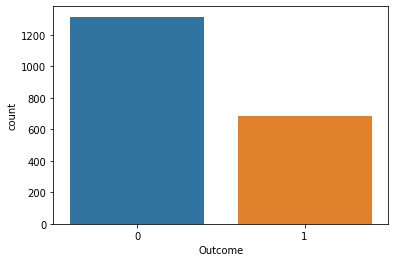

In [23]:
#Barplot visualization of number of non-diabetic (0) and diabetic (1) people in the dataset
print(df['Outcome'].value_counts())
sns.countplot(df['Outcome'])

## Finding correlation of every pair of features (and the outcome variable), and visualize the correlations using a heatmap ##

In [18]:
# Correlation Matrix
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.121537,0.197878,0.087605,0.054230,0.011288,-0.025453,0.539457,0.224437
Glucose,0.121537,1.000000,0.199323,0.208309,0.406556,0.232654,0.124141,0.259805,0.488020
BloodPressure,0.197878,0.199323,1.000000,0.202983,0.073310,0.259240,0.012074,0.323335,0.174481
SkinThickness,0.087605,0.208309,0.202983,1.000000,0.179486,0.517663,0.091822,0.133270,0.205527
Insulin,0.054230,0.406556,0.073310,0.179486,1.000000,0.187411,0.096155,0.089810,0.207696
BMI,0.011288,0.232654,0.259240,0.517663,0.187411,1.000000,0.142016,0.018455,0.282182
DiabetesPedigreeFunction,-0.025453,0.124141,0.012074,0.091822,0.096155,0.142016,1.000000,0.026569,0.155459
Age,0.539457,0.259805,0.323335,0.133270,0.089810,0.018455,0.026569,1.000000,0.236509
Outcome,0.224437,0.488020,0.174481,0.205527,0.207696,0.282182,0.155459,0.236509,1.000000


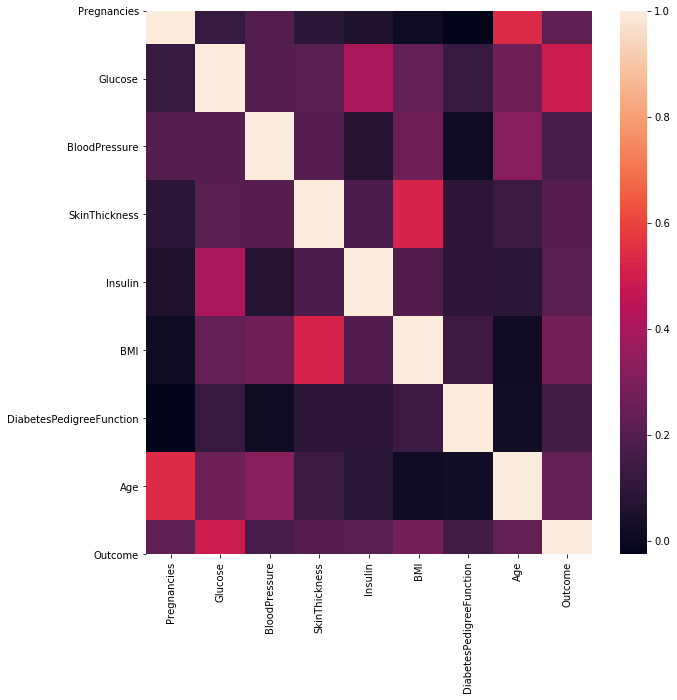

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())

# Machine Learning Model

## Splitting independent(x) and dependent(y) Data

In [24]:
# Split independent(x) and dependent(y) data
x=df[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]]
y=df["Outcome"]

In [25]:
x.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,138.0,62.000000,35.000000,153.743295,33.6
1,84.0,82.000000,31.000000,125.000000,38.2
2,145.0,72.403665,29.341275,153.743295,44.2
3,135.0,68.000000,42.000000,250.000000,42.3
4,139.0,62.000000,41.000000,480.000000,40.7


In [26]:
y.head()

0    1
1    0
2    1
3    1
4    0
Name: Outcome, dtype: int64

## Splitting Training and Testing Data

In [27]:
# Training Model using train_test_split
from sklearn.model_selection import train_test_split

In [28]:
# Train Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)
print(" x\t\t y ".center(30))
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

            x		 y             
Train set: (1600, 5) (1600,)
Test set: (400, 5) (400,)


# Importing Algorithms ##

The following algorithms will be tested on the given dataset and the one with the best performance would be declared suitable:

- Logistic Regression
- Random Forest Classifier
- Decision Tree Classifier
- K-Nearest Neighbors Classifier

In [29]:
#imporing all algorithm 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

## Testing and prediting on Logistic Regression

In [30]:
# Training the data
LR = LogisticRegression()
LR.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
# Predicting
y_pred_LR = LR.predict(x_test)
print("Test set Accuracy: ",accuracy_score(y_test, y_pred_LR))

Test set Accuracy:  0.735


## Testing and prediting on Random Forest Classifier

In [35]:
# Training the data
RF = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0,
                                max_features = 'auto', max_depth = 10)
RF.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [36]:
# Predicting
y_pred_RF = RF.predict(x_test)
print("Test set Accuracy: ",accuracy_score(y_test, y_pred_RF))

Test set Accuracy:  0.905


## Testing and prediting on Decision Tree Classifier

In [38]:
# Training the data
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [39]:
# Predicting
y_pred_DTC = DTC.predict(x_test)
print("Test set Accuracy: ",accuracy_score(y_test, y_pred_DTC))

Test set Accuracy:  0.97


## Testing and prediting on K-Nearest Neighbors Classifier

In [41]:
from sklearn import metrics

Ks = 10
mean_acc = np.zeros((Ks-1))

for n in range(1,Ks): #1-10
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

mean_acc

array([0.99  , 0.91  , 0.855 , 0.8075, 0.7825, 0.81  , 0.8   , 0.785 ,
       0.765 ])

In [34]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.99 with k= 1


In [44]:
# Training the data
KNC = KNeighborsClassifier(n_neighbors = 1)
KNC.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [45]:
# Predicting
y_pred_KNC=KNC.predict(x_test)
print("Test set Accuracy: ",accuracy_score(y_test, y_pred_KNC))

Test set Accuracy:  0.99


## Displaying the accuracy of all algorithm

In [46]:
print("Logistic Regression :",accuracy_score(y_test, y_pred_LR))
print("Random Forest Classifier :",accuracy_score(y_test, y_pred_RF))
print("Decision Tree Classifier :",accuracy_score(y_test, y_pred_DTC))
print("K-Nearest Neighbors Classifier:",accuracy_score(y_test, y_pred_KNC))

Logistic Regression : 0.735
Random Forest Classifier : 0.905
Decision Tree Classifier : 0.97
K-Nearest Neighbors Classifier: 0.99
